# Devoir Python

Vous devez rendre votre devoir sur GitHub.
Vous avez le droit a tout vos documents et a internet

1. votre depot doit etre privé
2. vous devez inviter comme colaborateur votre chargé de TD/TP
3. Seul le dernier commit avant la fin de la séance sera corrigé.


Ex 1: Integrale de Romberg

Ecrire une fonction integ_romberg(f, a, b, epsilon=1e-6) permettant de calculer l’intégrale numérique de la fonction f entre les bornes a et b avec une précision epsilon selon la méthode de Romberg (https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Romberg).

Il s’agit d’une méthode qui permet d’améliorer les méthodes usuelles de calcul numérique des intégrales, comme la méthode des Trapèzes.
On montre qu’en combinant judicieusement les valeurs obtenues par la méthode des Trapèzes pour différentes subdivisons de l’intervalle d’intégration, on augmente l’ordre de convergence (sa vitesse de convergence). 


In [1]:
from scipy import integrate

from scipy.special import erf

def integ_romberg(f, a, b, epsilon):
    integrate.romberg(f, a, b, tol=epsilon, show=True) #intégration de romberg de f entre a et b avec une tolérence de epsilon
                                                        #show permet d'afficher le résultat

fonction = lambda x: x*x

integ_romberg(fonction, 0, 1, 1e-6)


Romberg integration of <function vectorize1.<locals>.vfunc at 0x000001558C5F2730> from [0, 1]

 Steps  StepSize   Results
     1  1.000000  0.500000 
     2  0.500000  0.375000  0.333333 
     4  0.250000  0.343750  0.333333  0.333333 

The final result is 0.3333333333333333 after 5 function evaluations.


Ex 2: Équation d’état de l’eau à partir de la dynamique moléculaire

Afin de modéliser les planètes de type Jupiter, Saturne, ou même des exo-planètes très massives (dites « super-Jupiters »), la connaissance de l’équation d’état des composants est nécessaire. Ces équations d’état doivent être valables jusqu’à plusieurs centaines de méga-bar ; autrement dit, celles-ci ne sont en aucun cas accessibles expérimentalement. On peut cependant obtenir une équation d’état numériquement à partir d’une dynamique moléculaire.

Le principe est le suivant : on place dans une boite un certain nombre de particules régies par les équations microscopiques (Newton par exemple, ou même par des équations prenant en considération la mécanique quantique) puis on laisse celles-ci évoluer dans la boite ; on calcule à chaque pas de temps l’énergie interne à partir des intéractions électrostatiques et la pression à partir du tenseur des contraintes. On obtient en sortie l’évolution du système pour une densité fixée (par le choix de taille de la boite) et une température fixée (par un algorithme de thermostat que nous ne détaillerons pas ici).

On se propose d’analyser quelques fichiers de sortie de tels calculs pour l’équation d’état de l’eau à très haute pression. Les fichiers de sortie sont disponibles ici; leur nom indique les conditions thermodynamiques correspondant au fichier, p.ex. 6000K_30gcc.out pour T=6000
K et ρ=30 gcc. Le but est, pour chaque condition température-densité, d’extraire l’évolution de l’énergie et de la pression au cours du temps, puis d’en extraire la valeur moyenne ainsi que les fluctuations. Il arrive souvent que l’état initial choisi pour le système ne corresponde pas à son état d’équilibre, et qu’il faille donc « jeter » les quelques pas de temps en début de simulation qui correspondent à cette relaxation du système. Pour savoir combien de temps prend cette relaxation, il sera utile de tracer l’évolution au cours du temps de la pression et l’énergie pour quelques simulations. Une fois l’équation d’état P(ρ,T) et E(ρ,T) extraite, on pourra tracer le réseau d’isothermes.

Ex 3: Le problème du voyageur de commerce

Le problème du voyageur de commerce est un problème d’optimisation consistant à déterminer le plus court chemin reliant un ensemble de destinations. Il n’existe pas d’algorithme donnant la solution optimale en un temps raisonnable (problème NP-complet), mais l’on peut chercher à déterminer des solutions approchées. On va se placer ici dans le cas d’un livreur devant desservir une seule fois chacune desndestinations d’une ville américaine où les rues sont agencées en réseau carré. 

On utilise la « distance deManhattan »  entre deux points 𝐴(𝑥𝐴,𝑦𝐴) et 𝐵(𝑥𝐵,𝑦𝐵) : 𝑑(𝐴,𝐵) =|𝑥𝐵−𝑥𝐴|+|𝑦𝐵−𝑦𝐴|.

En outre, on se place dans le cas où les coordonnées des destinations sont entières, comprises entre 0 (inclus) et TAILLE = 50 (exclus). Deux destinations peuvent éventuellement avoir les mêmes coordonnées. Les instructions suivantes doivent permettre de définir les classes nécessaires (Ville et Trajet) et de développer un algorithme approché (heuristiques) : l’algorithme du plus proche voisin. 

Seules la librairie standard et la librairie numpy sont utilisables si nécessaire. Implementer les classes et methodes suivante:


Classe Ville:
* __init__(): initialisation d’une ville sans destination.
* aleatoire(n): création de n destinations aléatoires.
* nb_trajet(): retourne le nombre total (entier) de trajets :(𝑛−1)!/2(utilisermath.factorial()).
* distance(i, j): retourne la distance (Manhattan) entre les deux destinations de numéro i et j


Classe Trajet:
* __init__(ville, etapes=None): initialisation sur une ville. Si la liste etapes n’est pas spécifiée, le trajet par défaut est celui suivant les destinations de ville.
* longueur(): retourne la longueur totale du trajetbouclé(i.e. revenant à son point de départ).


Plus proche voisin:
* Ville.plus_proche(i, exclus=[]): retourne la destination la plus proche de la destinationi(au sens de Ville.distance()), hors les destinations de la liste exclus
* Ville.trajet_voisins(depart=0): retourne un Trajet déterminé selon l’heuristique des plus proches voisins (i.e. l’étape suivante est la destination la plus proche hors les destinations déjà visitées) en partant de l’étape initiale depart

Optimisation:
* Proposer un algorithme qui propose une meilleur alternative au "plus proche voisin".

Interface:
* Ville.figure(trajet=None): Afficher le plande la ville et le trajet obtenue (utiliser matplotlib.step()pour des trajets de type « Manhattan »)

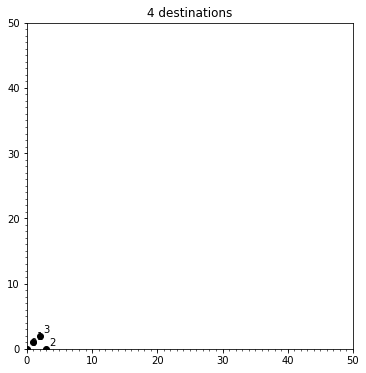

In [28]:
#Pour l'optimisation on peut utilisé les interversion (pas le temps de le réaliser)

import math
import numpy as np

import matplotlib.pyplot as pl

N.random.seed(123)
TAILLE = 50

class Ville(object): #Class Ville

    def __init__(self): #Création d'une ville sans destination
        self.destinations = np.array([]).reshape(-1, 2)

    def aleatoire(self, n=20): #Création de n destinations aléatoires.
        self.destinations = np.random.randint(TAILLE, size=(n, 2))

    def nb_trajets(self): #Renvoie le nombre total (entier) de trajets: (n-1)!/2(utilisermath.factorial())
        ntrajet = len(self.destinations)
        if ntrajet > 2:
            return int(math.factorial(ntrajet - 1) / 2) #Renvoie le nombre total de trajets
        elif ntrajet > 0:  
            return 1 #Comme le calcule n'est pas faisable pour 2 destinnation on renvoie directement 1.
        else:
            return 0

    def distance(self, i, j): #Retourne la distance (Manhattan) entre les deux destinations de numéro i et j
        return np.abs(self.destinations[i] - self.destinations[j]).sum() #réalise 𝑑(I,J) =|𝑥J−𝑥I|+|𝑦J−𝑦I|
    
    def plus_proche(self, i, exclus=[]): #Retourne la destination la plus proche de la destination i(au sens de Ville.distance()), hors les destinations de la liste exclus
        villes_voisines = [ j for j in range(len(self.destinations)) #liste les villes voisinnes
                    if j != i and j not in exclus ] #Enlève les villes exclus et la ville selectionnée
        for j in villes_voisines :
            distances = [ self.distance(i, j) ] #Calcule la distance entre les villes voisines

        return villes_voisines[np.argmin(distances)] #avec np.argmin() on renvoie que la ville voisine avec la plus petite distance
    
    def trajet_voisins(self, depart=0): #retourne un Trajet déterminé selon l’heuristique des plus proches voisins 
                                        #(i.e. l’étape suivante est la destination la plus proche hors les destinations déjà visitées) en partant de l’étape initiale depart
        nb_dest = len(self.destinations)
        if depart is None: # Si le départ n'est pas imposé on test tous les départs possibles
            for i in rang(nb_dest):
                trajets = [ self.trajet_voisins(depart=i) ] #Remplis le tableau trajets avec tous les trajets entre voisins
            for k in trajets:
                longueurs = [ k.longueur() ] #Calcule des différentes longueures de trajet
            return trajets[N.argmin(longueurs)] #avec np.argmin() on renvoie que le trajet avec la plus petite distance
        
        else: # Si le départ est imposé
            etapes = [depart] #Première étape
            while len(etapes) < nb_dest: #Tant qu'il reste des étapes
                i = etapes[-1] #i = étape précédente
                j = self.plus_proche(i, exclus=etapes[:-1]) #j est étape la plus proche en ayant exlus l'étape précédente (qui est la plus proche)
                etapes.append(j) #Ajout de l'étapes j dans  la liste etapes
            return Trajet(self, etapes)
        
    def figure(self, offset=0): #Afficher le plande la ville et le trajet obtenue (utiliser matplotlib.step()pour des trajets de type « Manhattan »)

        fig = pl.figure(figsize=(6,6))
        ax = fig.add_subplot(1,1,1, aspect='equal', xlim=(0, TAILLE), ylim=(0, TAILLE), title="{} destinations".format(len(self.destinations)))
        minor_loc = pl.matplotlib.ticker.MultipleLocator(1)
        ax.xaxis.set_minor_locator(minor_loc)
        ax.yaxis.set_minor_locator(minor_loc)
        ax.autoscale(False)

        ax.plot(self.destinations[:, 0], self.destinations[:, 1],
                'ko', zorder=10)
        for i,(x,y) in enumerate(self.destinations): #ax.text(x, y, ' '+str(i))
            ax.annotate(str(i), xy=(x, y), xytext=(x+0.5, y+0.5), zorder=10)
            
        return ax

        
        
        
        
class Trajet(object): #Class Trajet

    def __init__(self, ville, etapes=None): #initialisation sur une ville
        assert isinstance(ville, Ville)
        self.ville = ville
        if etapes is None:                     
            self.etapes = np.arange(len(self.ville.destinations)) # Création d'un trajet par défaut
        else:
            self.etapes = np.array(etapes) #Création d'un trajet étape par étape

    def longueur(self): #Retourne la longueur totale du trajetbouclé(i.e. revenant à son point de départ)
        for i in range(len(self.etapes)-1):
            long = sum( self.ville.distance(self.etapes[i], self.etapes[i+1])) #Longeur=Somme des distances entre les étapes
        long += self.ville.distance(self.etapes[-1], self.etapes[0]) #Ajoute à longeur la distance entre le point de départ et la première étapes
        return long
    
    
ville = Ville()
ville.aleatoire(10)
ville.destinations = N.array([[0, 0], [1, 1], [3, 0], [2, 2]])
trajet = Trajet(ville)
ville.plus_proche(0)
ville.trajet_voisins(0)
ville.figure()

    
